### RFM 분석 보고서

In [1]:
import pandas as pd
import numpy as np

#### 컬럼별 설명
- Invoice ID (ID) : 사용자 ID
- Branch : 장소 타입 
- Product line : 상품 종류
- gross margin percentage : 매출 총 이익률 
- gross income :판매량 외 소득 
- Rating : 평점 
- cogs : 매출원가

#### 기획 
성별, 도시별, 상품별에 따른 RFM 분석

In [2]:
df = pd.read_csv('./datasets/Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
# 컬럼명 변경 Invoice ID -> ID
df.rename(columns={'Invoice ID': 'ID'}, inplace=True)
df

,ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.isna().sum() # 결측치 없음 

ID                         0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# 'Branch' 열을 삭제 고객들의 도시를 나타내는 City로 대체할 수 있기 때문에
df.drop(columns=['Branch'], inplace=True)
df

,ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [7]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')
df

,ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019/01/05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019/03/08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019/03/03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019/01/27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019/02/08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019/01/29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019/03/02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019/02/09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019/02/22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [8]:
df['Recency'] = (pd.to_datetime('2019-3-30') - pd.to_datetime(df['Date'])).dt.days
df

,ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Recency
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019/01/05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,84
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019/03/08,10:29,Cash,76.40,4.761905,3.8200,9.6,22
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019/03/03,13:23,Credit card,324.31,4.761905,16.2155,7.4,27
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019/01/27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,62
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019/02/08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019/01/29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,60
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019/03/02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,28
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019/02/09,13:22,Cash,31.84,4.761905,1.5920,7.7,49
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019/02/22,15:33,Cash,65.82,4.761905,3.2910,4.1,36


In [9]:
rf_df = df.groupby('ID').agg(Recency=('Recency','min'), Frequency=('Quantity', 'sum'))
rf_df

,Recency,Frequency
ID,,
101-17-6199,17,7
101-81-4070,72,2
102-06-2002,10,5
102-77-2261,25,7
105-10-6182,31,2
...,...,...
894-41-5205,70,8
895-03-6665,42,9
895-66-0685,25,3


In [10]:
rf_df.reset_index()

,ID,Recency,Frequency
0,101-17-6199,17,7
1,101-81-4070,72,2
2,102-06-2002,10,5
3,102-77-2261,25,7
4,105-10-6182,31,2
...,...,...,...
995,894-41-5205,70,8
996,895-03-6665,42,9
997,895-66-0685,25,3
998,896-34-0956,63,1


In [11]:
m_df = df.copy()
m_df.loc[:,'Monetary'] = m_df['Total']
m_df

,ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Recency,Monetary
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019/01/05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,84,548.9715
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019/03/08,10:29,Cash,76.40,4.761905,3.8200,9.6,22,80.2200
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019/03/03,13:23,Credit card,324.31,4.761905,16.2155,7.4,27,340.5255
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019/01/27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,62,489.0480
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019/02/08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,50,634.3785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019/01/29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,60,42.3675
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019/03/02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,28,1022.4900
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019/02/09,13:22,Cash,31.84,4.761905,1.5920,7.7,49,33.4320
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019/02/22,15:33,Cash,65.82,4.761905,3.2910,4.1,36,69.1110


In [12]:
m_df = m_df.groupby('ID')[['Monetary']].sum()
m_df

,Monetary
ID,
101-17-6199,336.5565
101-81-4070,131.9220
102-06-2002,132.5625
102-77-2261,480.0285
105-10-6182,45.1080
...,...
894-41-5205,362.7120
895-03-6665,345.0195
895-66-0685,56.9520


In [13]:
rf_df = rf_df.reset_index()
rf_df

,ID,Recency,Frequency
0,101-17-6199,17,7
1,101-81-4070,72,2
2,102-06-2002,10,5
3,102-77-2261,25,7
4,105-10-6182,31,2
...,...,...,...
995,894-41-5205,70,8
996,895-03-6665,42,9
997,895-66-0685,25,3
998,896-34-0956,63,1


In [14]:
m_df = m_df.reset_index()
m_df

,ID,Monetary
0,101-17-6199,336.5565
1,101-81-4070,131.9220
2,102-06-2002,132.5625
3,102-77-2261,480.0285
4,105-10-6182,45.1080
...,...,...
995,894-41-5205,362.7120
996,895-03-6665,345.0195
997,895-66-0685,56.9520
998,896-34-0956,22.3860


In [15]:
rfm_df = rf_df.merge(m_df, on='ID')
rfm_df

,ID,Recency,Frequency,Monetary
0,101-17-6199,17,7,336.5565
1,101-81-4070,72,2,131.9220
2,102-06-2002,10,5,132.5625
3,102-77-2261,25,7,480.0285
4,105-10-6182,31,2,45.1080
...,...,...,...,...
995,894-41-5205,70,8,362.7120
996,895-03-6665,42,9,345.0195
997,895-66-0685,25,3,56.9520
998,896-34-0956,63,1,22.3860


In [16]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [17]:
rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df

,ID,Recency,Frequency,Monetary
0,101-17-6199,0.193182,0.666667,0.315782
1,101-81-4070,0.818182,0.111111,0.117487
2,102-06-2002,0.113636,0.444444,0.118108
3,102-77-2261,0.284091,0.666667,0.454809
4,105-10-6182,0.352273,0.111111,0.033363
...,...,...,...,...
995,894-41-5205,0.795455,0.777778,0.341127
996,895-03-6665,0.477273,0.888889,0.323983
997,895-66-0685,0.284091,0.222222,0.044840
998,896-34-0956,0.715909,0.000000,0.011345


In [18]:
rfm_df['Recency'] = 1 - rfm_df['Recency']

In [19]:
rfm_df

,ID,Recency,Frequency,Monetary
0,101-17-6199,0.806818,0.666667,0.315782
1,101-81-4070,0.181818,0.111111,0.117487
2,102-06-2002,0.886364,0.444444,0.118108
3,102-77-2261,0.715909,0.666667,0.454809
4,105-10-6182,0.647727,0.111111,0.033363
...,...,...,...,...
995,894-41-5205,0.204545,0.777778,0.341127
996,895-03-6665,0.522727,0.888889,0.323983
997,895-66-0685,0.715909,0.222222,0.044840
998,896-34-0956,0.284091,0.000000,0.011345


In [20]:
rfm_df.loc[:, 'TotalScore'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']
rfm_df

,ID,Recency,Frequency,Monetary,TotalScore
0,101-17-6199,0.806818,0.666667,0.315782,1.789267
1,101-81-4070,0.181818,0.111111,0.117487,0.410417
2,102-06-2002,0.886364,0.444444,0.118108,1.448916
3,102-77-2261,0.715909,0.666667,0.454809,1.837385
4,105-10-6182,0.647727,0.111111,0.033363,0.792201
...,...,...,...,...,...
995,894-41-5205,0.204545,0.777778,0.341127,1.323450
996,895-03-6665,0.522727,0.888889,0.323983,1.735599
997,895-66-0685,0.715909,0.222222,0.044840,0.982971
998,896-34-0956,0.284091,0.000000,0.011345,0.295436


In [21]:
merge_df = df.merge(rfm_df[['ID', 'TotalScore']], on='ID')
merge_df

,ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Recency,TotalScore
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019/01/05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,84,1.233737
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019/03/08,10:29,Cash,76.40,4.761905,3.8200,9.6,22,1.261831
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019/03/03,13:23,Credit card,324.31,4.761905,16.2155,7.4,27,1.679476
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019/01/27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,62,1.536781
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019/02/08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,50,1.702862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019/01/29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,60,0.348889
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019/03/02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,28,2.662283
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019/02/09,13:22,Cash,31.84,4.761905,1.5920,7.7,49,0.465230
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019/02/22,15:33,Cash,65.82,4.761905,3.2910,4.1,36,0.647531


In [22]:
import numpy as np

l1, l2, l3, l4 = np.percentile(merge_df['TotalScore'], [20, 50, 75, 90])
print(l1, l2, l3, l4)

0.7751064412323225 1.2750403981822436 1.7426029355858266 2.0914171128889083


In [23]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [24]:
merge_df['Level'] = merge_df['TotalScore'].apply(get_level)
merge_df

,ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Recency,TotalScore,Level
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019/01/05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,84,1.233737,4
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019/03/08,10:29,Cash,76.40,4.761905,3.8200,9.6,22,1.261831,4
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019/03/03,13:23,Credit card,324.31,4.761905,16.2155,7.4,27,1.679476,3
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019/01/27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,62,1.536781,3
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019/02/08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,50,1.702862,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019/01/29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,60,0.348889,5
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019/03/02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,28,2.662283,1
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019/02/09,13:22,Cash,31.84,4.761905,1.5920,7.7,49,0.465230,5
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019/02/22,15:33,Cash,65.82,4.761905,3.2910,4.1,36,0.647531,5


In [25]:
merge_df['Level'] = merge_df['Level'].replace([5,4,3,2,1],
                                             ['Silver','Gold','Royal','VIP','VVIP'])

In [26]:
# 시간형식을 시간 단위로 바꾸자 
merge_df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

In [27]:
import pandas as pd

# merge_df에 있는 'Date' 컬럼을 활용하여 'Month' 컬럼 생성
import pandas as pd

# merge_df에 있는 'Date' 컬럼을 활용하여 'Year_Month' 컬럼 생성
merge_df['Month'] = pd.to_datetime(merge_df['Date'], format='%Y/%m/%d').dt.to_period('M')

print(merge_df)


merge_df


              ID       City Customer type  Gender            Product line  \
0    750-67-8428     Yangon        Member  Female       Health and beauty   
1    226-31-3081  Naypyitaw        Normal  Female  Electronic accessories   
2    631-41-3108     Yangon        Normal    Male      Home and lifestyle   
3    123-19-1176     Yangon        Member    Male       Health and beauty   
4    373-73-7910     Yangon        Normal    Male       Sports and travel   
..           ...        ...           ...     ...                     ...   
995  233-67-5758  Naypyitaw        Normal    Male       Health and beauty   
996  303-96-2227   Mandalay        Normal  Female      Home and lifestyle   
997  727-02-1313     Yangon        Member    Male      Food and beverages   
998  347-56-2442     Yangon        Normal    Male      Home and lifestyle   
999  849-09-3807     Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%      Total        Date  Time      Paymen

,ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Recency,TotalScore,Level,Month
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019/01/05,13,Ewallet,522.83,4.761905,26.1415,9.1,84,1.233737,Gold,2019-01
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019/03/08,10,Cash,76.40,4.761905,3.8200,9.6,22,1.261831,Gold,2019-03
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019/03/03,13,Credit card,324.31,4.761905,16.2155,7.4,27,1.679476,Royal,2019-03
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019/01/27,20,Ewallet,465.76,4.761905,23.2880,8.4,62,1.536781,Royal,2019-01
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019/02/08,10,Ewallet,604.17,4.761905,30.2085,5.3,50,1.702862,Royal,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019/01/29,13,Ewallet,40.35,4.761905,2.0175,6.2,60,0.348889,Silver,2019-01
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019/03/02,17,Ewallet,973.80,4.761905,48.6900,4.4,28,2.662283,VVIP,2019-03
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019/02/09,13,Cash,31.84,4.761905,1.5920,7.7,49,0.465230,Silver,2019-02
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019/02/22,15,Cash,65.82,4.761905,3.2910,4.1,36,0.647531,Silver,2019-02


In [28]:
merge_df

,ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Recency,TotalScore,Level,Month
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019/01/05,13,Ewallet,522.83,4.761905,26.1415,9.1,84,1.233737,Gold,2019-01
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019/03/08,10,Cash,76.40,4.761905,3.8200,9.6,22,1.261831,Gold,2019-03
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019/03/03,13,Credit card,324.31,4.761905,16.2155,7.4,27,1.679476,Royal,2019-03
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019/01/27,20,Ewallet,465.76,4.761905,23.2880,8.4,62,1.536781,Royal,2019-01
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019/02/08,10,Ewallet,604.17,4.761905,30.2085,5.3,50,1.702862,Royal,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019/01/29,13,Ewallet,40.35,4.761905,2.0175,6.2,60,0.348889,Silver,2019-01
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019/03/02,17,Ewallet,973.80,4.761905,48.6900,4.4,28,2.662283,VVIP,2019-03
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019/02/09,13,Cash,31.84,4.761905,1.5920,7.7,49,0.465230,Silver,2019-02
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019/02/22,15,Cash,65.82,4.761905,3.2910,4.1,36,0.647531,Silver,2019-02


In [29]:
# 경고 메세지 무시 

import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)


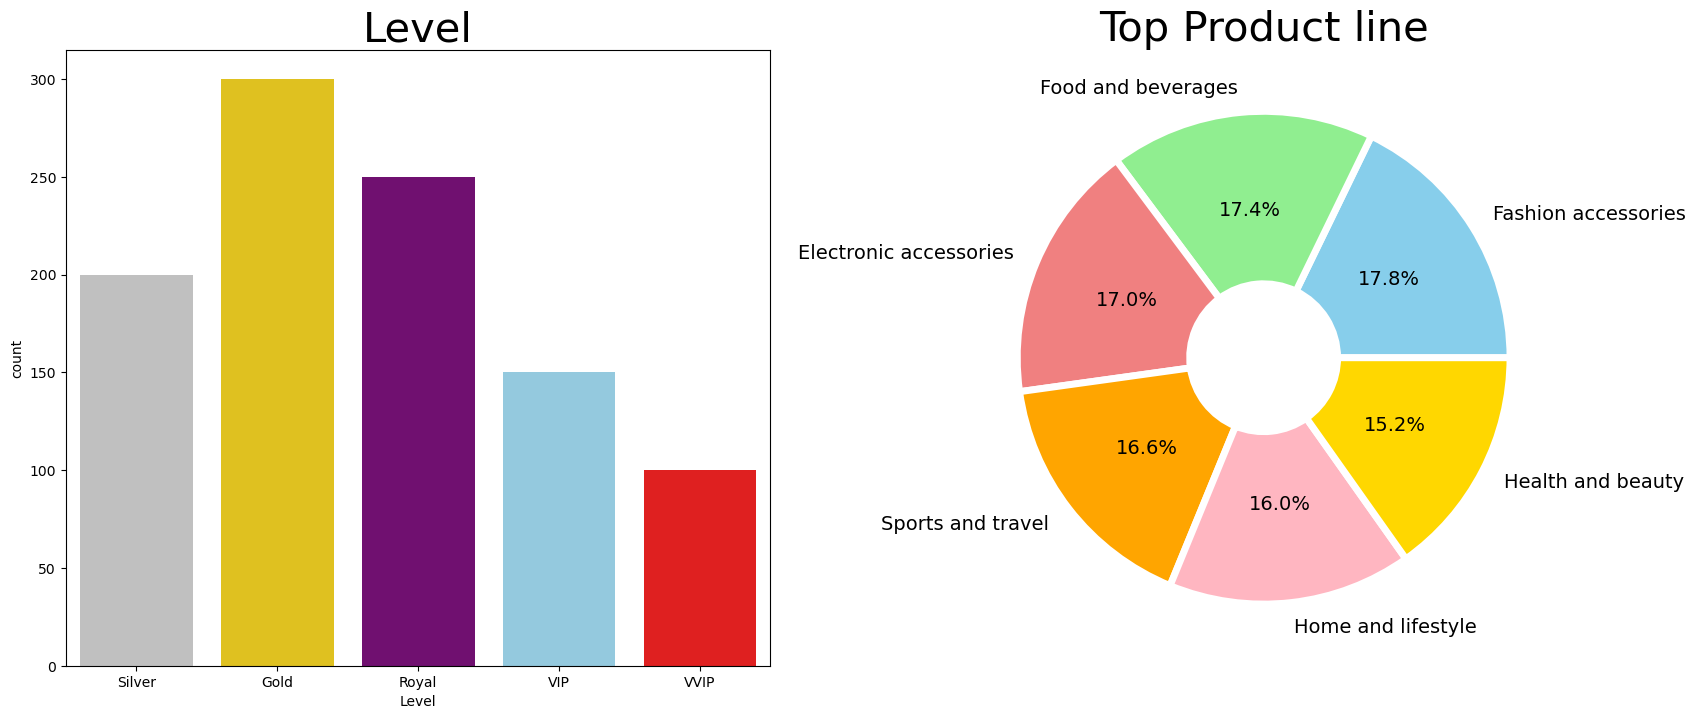

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

product_counts = merge_df['Product line'].value_counts()
top_products = product_counts.head(10)
product_filter_df = merge_df[merge_df['Product line'].isin(top_products.index)]

order_columns = ['Silver', 'Gold', 'Royal', 'VIP', 'VVIP']
colors = {'Silver': 'silver', 'Gold': 'gold', 'Royal': 'purple', 'VIP': 'skyblue', 'VVIP': 'red'}

pie_colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'gold']

sns.countplot(ax=axes[0], x='Level', data=merge_df, palette=colors, order=order_columns)
axes[0].set_title('Level', fontsize=30)

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
axes[1].pie(product_filter_df['Product line'].value_counts(), labels=top_products.index, colors=pie_colors,wedgeprops=wedgeprops , autopct='%1.1f%%'
           ,textprops={'fontsize': 14})
axes[1].set_title('Top Product line', fontsize=30)

plt.show()

#### 분석결과 
- 💡 우선 골드 등급이 가장 높았고, 로얄등급이 그 다음으로 높은 등급인 것을 보아, 이 매장의 사업 현황으로는 정상적인 수치를 보인다고 할 수 있습니다.
- 오른쪽 그래프는 상품 품목별 판매 분포수인데, 모든 품목들이 골고루 분포되어 있지만 그중에 가장 높은 수치를 기록한 품목은 식품&음료 품목으로 17.8% 의 수치이며, 가장 적은 수치의 품목은 건강&화장 품목입니다.
  
- 이 결과를 보았을 때 해당 매장에서 가장 인기 있는 품목은 식품&음료 품목인 것을 판단할 수 있었습니다.
-  그 다음으로 성별 분포와 결제 수단 분포에 대해서 말씀드리겠습니댜.

Text(0.5, 1.0, 'Payment distribution')

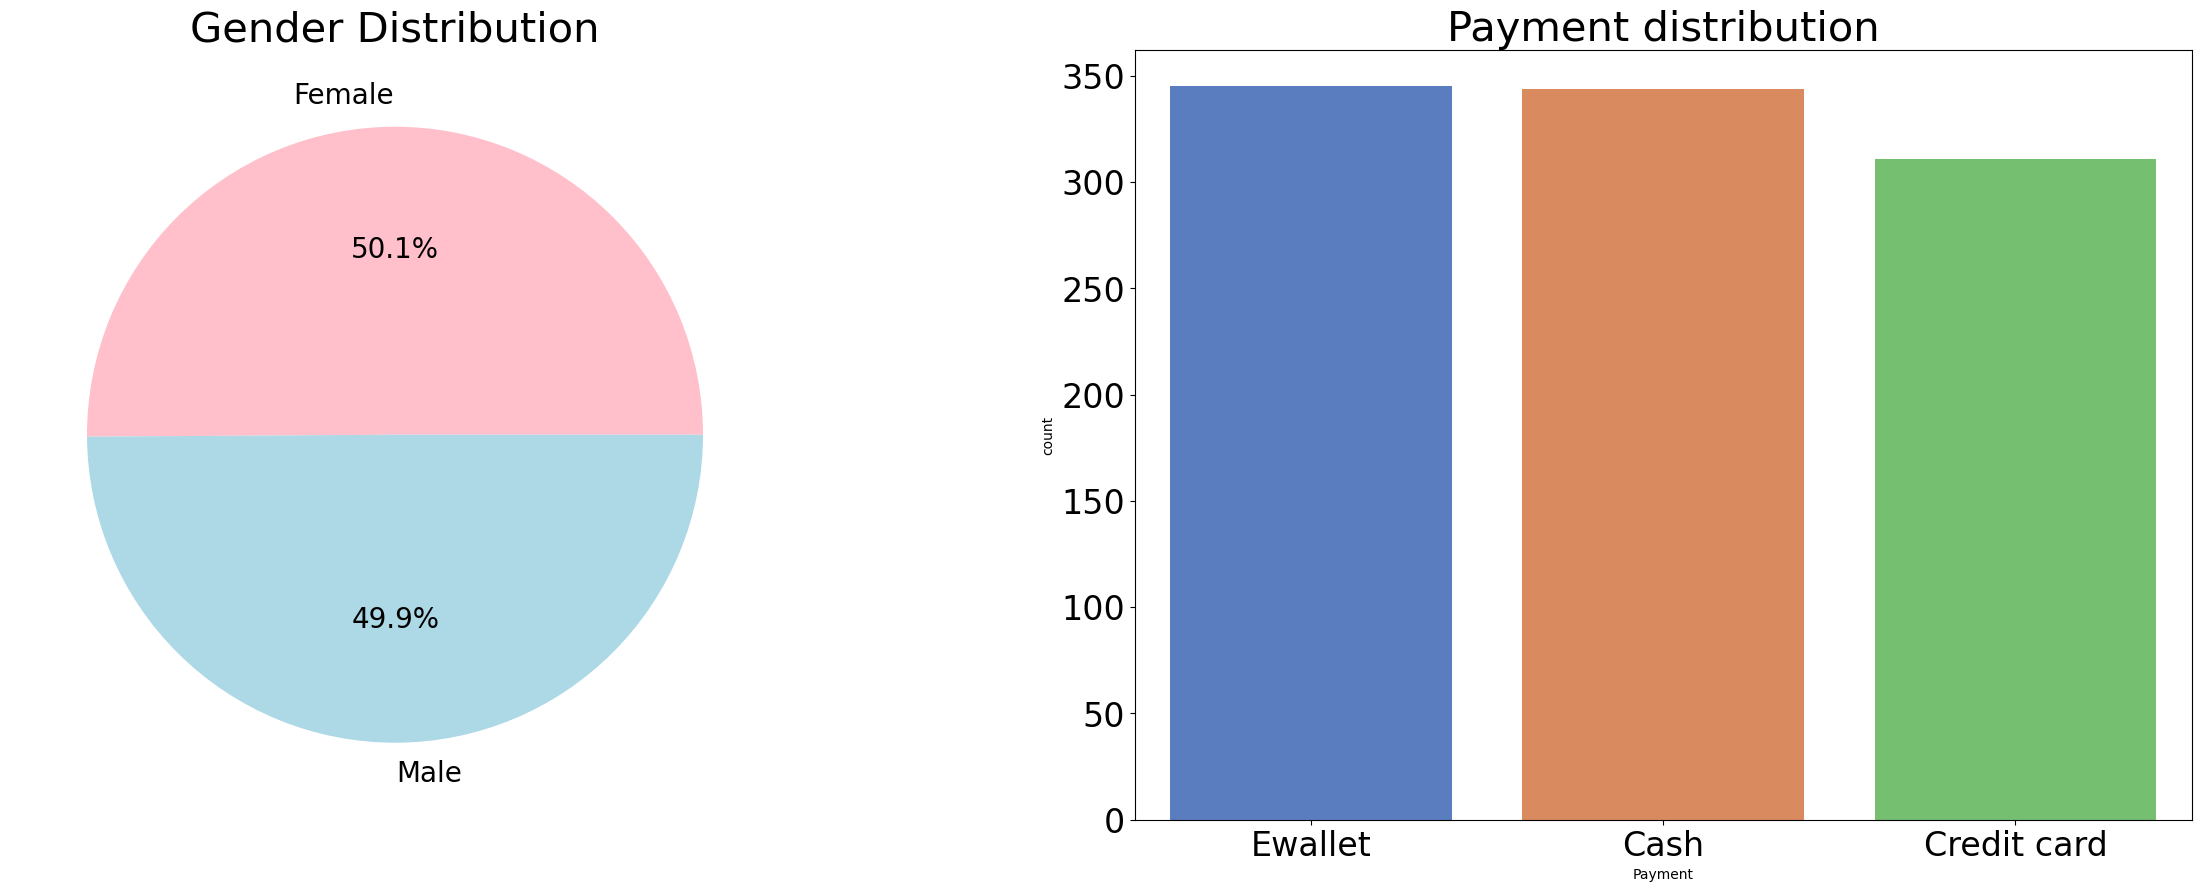

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt 
gender_counts = merge_df['Gender'].value_counts()
labels = gender_counts.index
values = gender_counts.values
colors = ['pink', 'lightblue']


fig, axes = plt.subplots(1, 2, figsize=(30, 10))
axes[0].pie(values, labels=labels, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 20})
axes[0].set_title('Gender Distribution', fontsize=30)

# 집계 차트
sns.countplot(ax=axes[1], x='Payment', data=merge_df, palette='muted')
axes[1].tick_params(labelsize=24) 
axes[1].set_title('Payment distribution', fontsize=30)

#### 성별 비율, 결제수단 비율 분석결과 
> 여성이 50.1%,남성이 49.9%로 각각 비슷한 수치를 보인다.
> 결제수단의 경우 전자지갑과 현금의 비율이 동일했으며, 신용카드가 제일 낮았다.

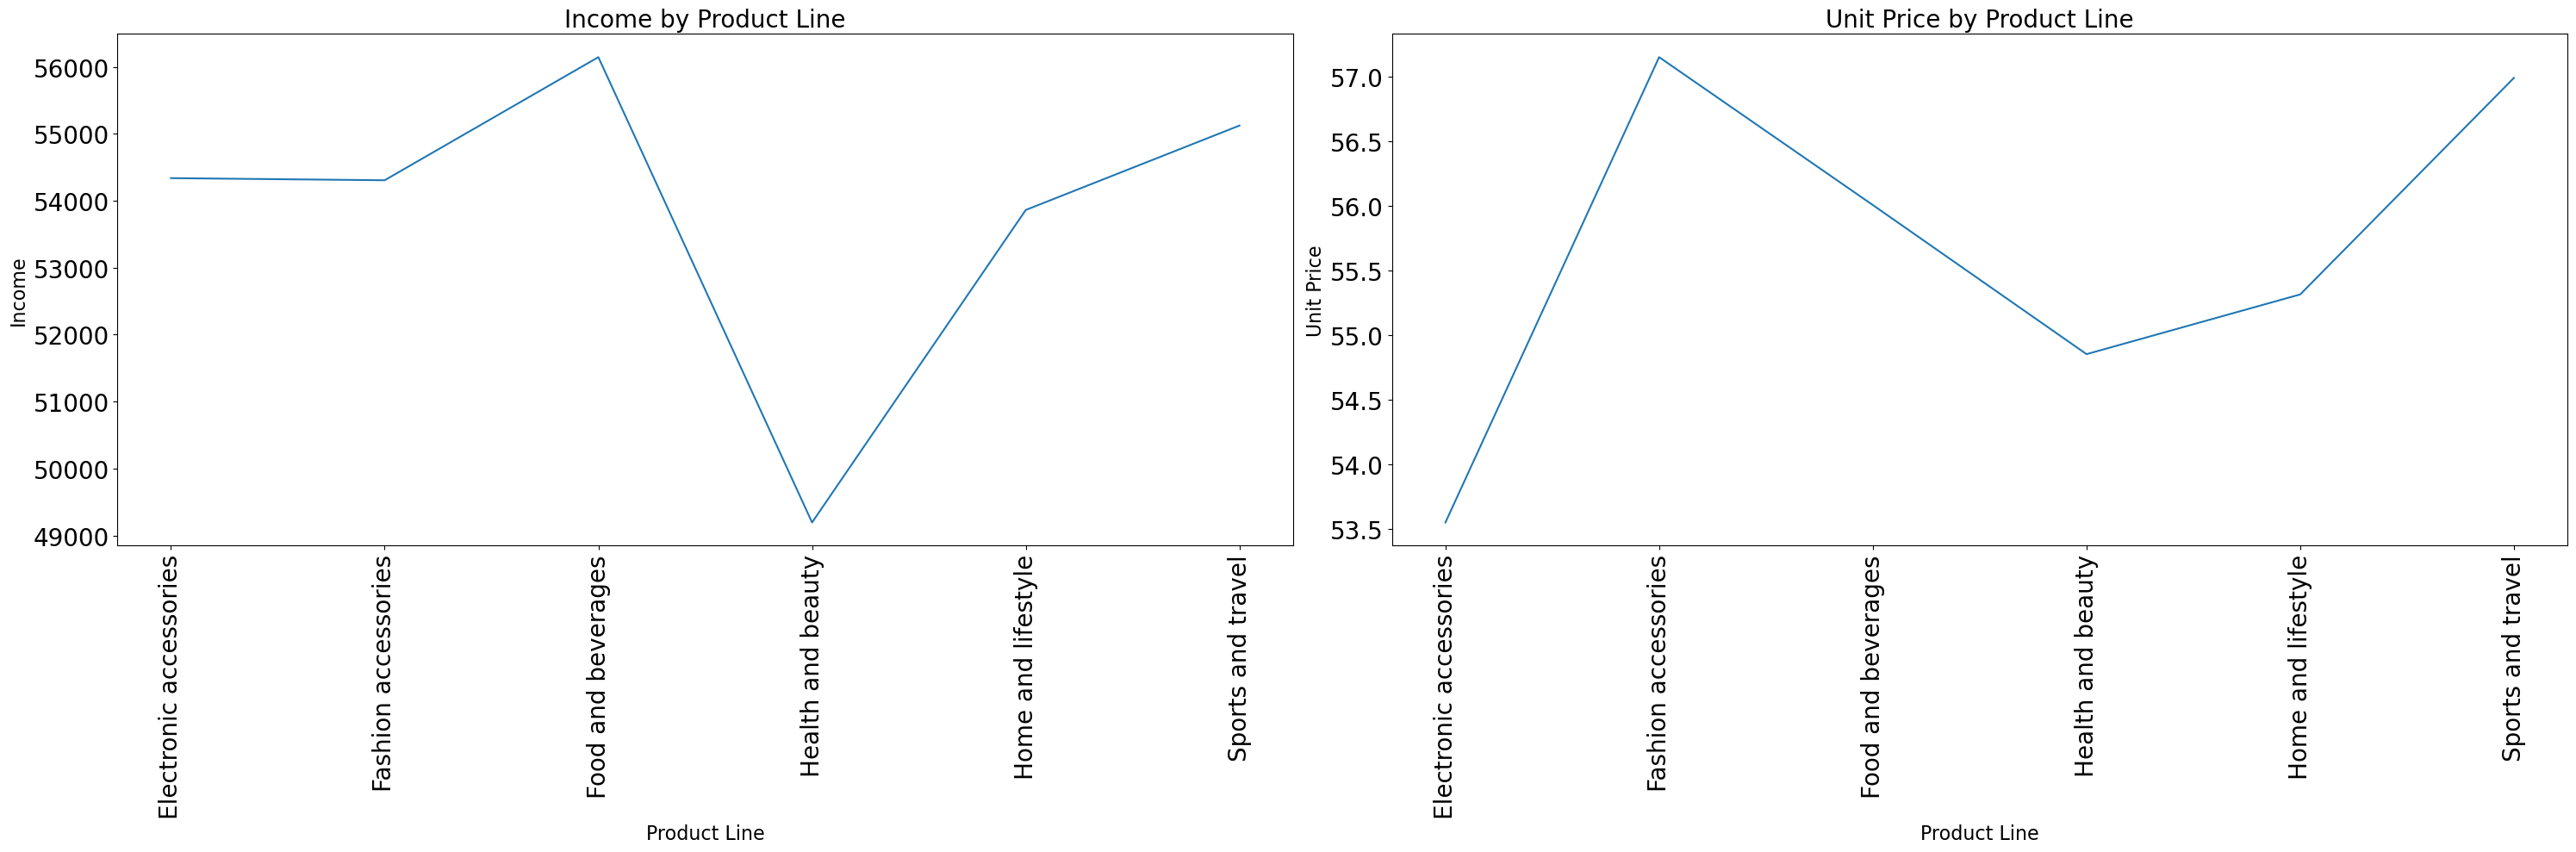

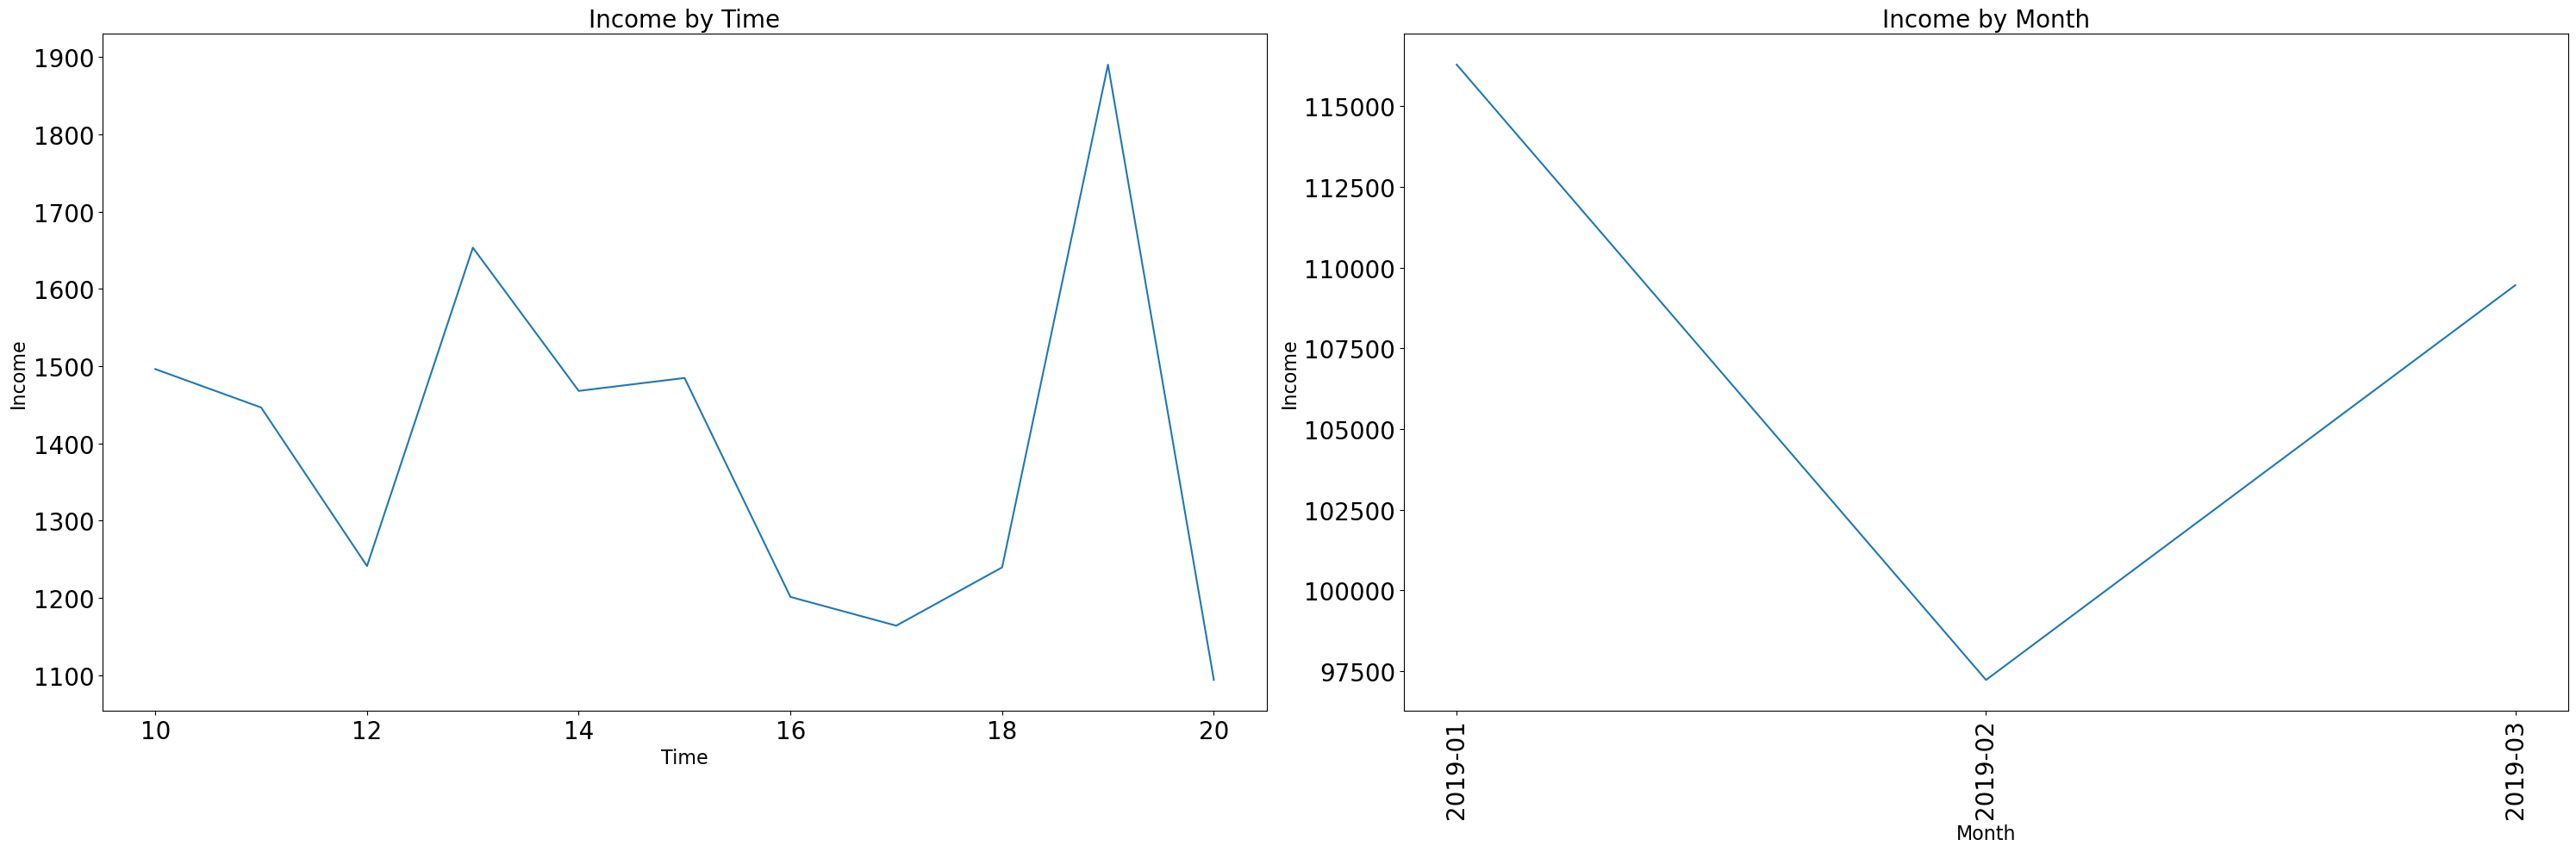

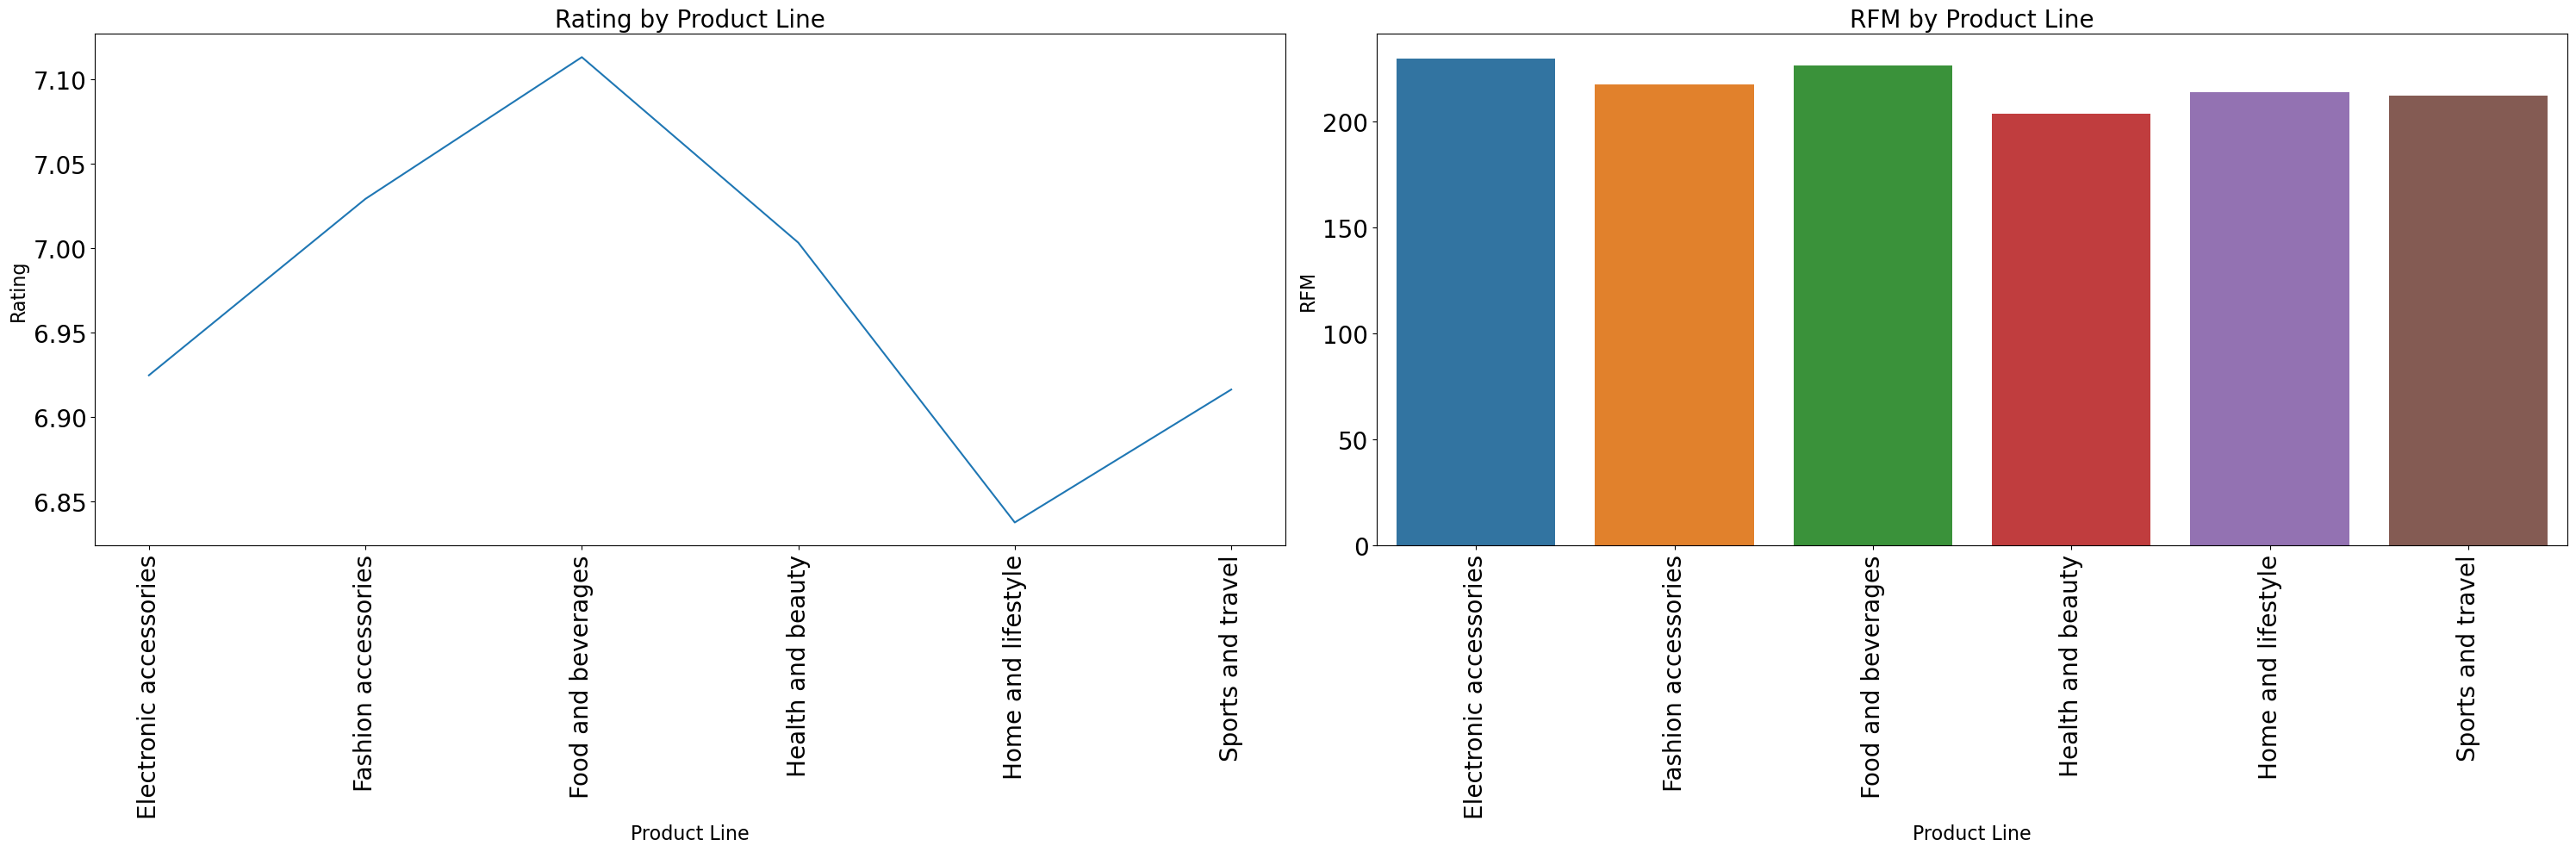

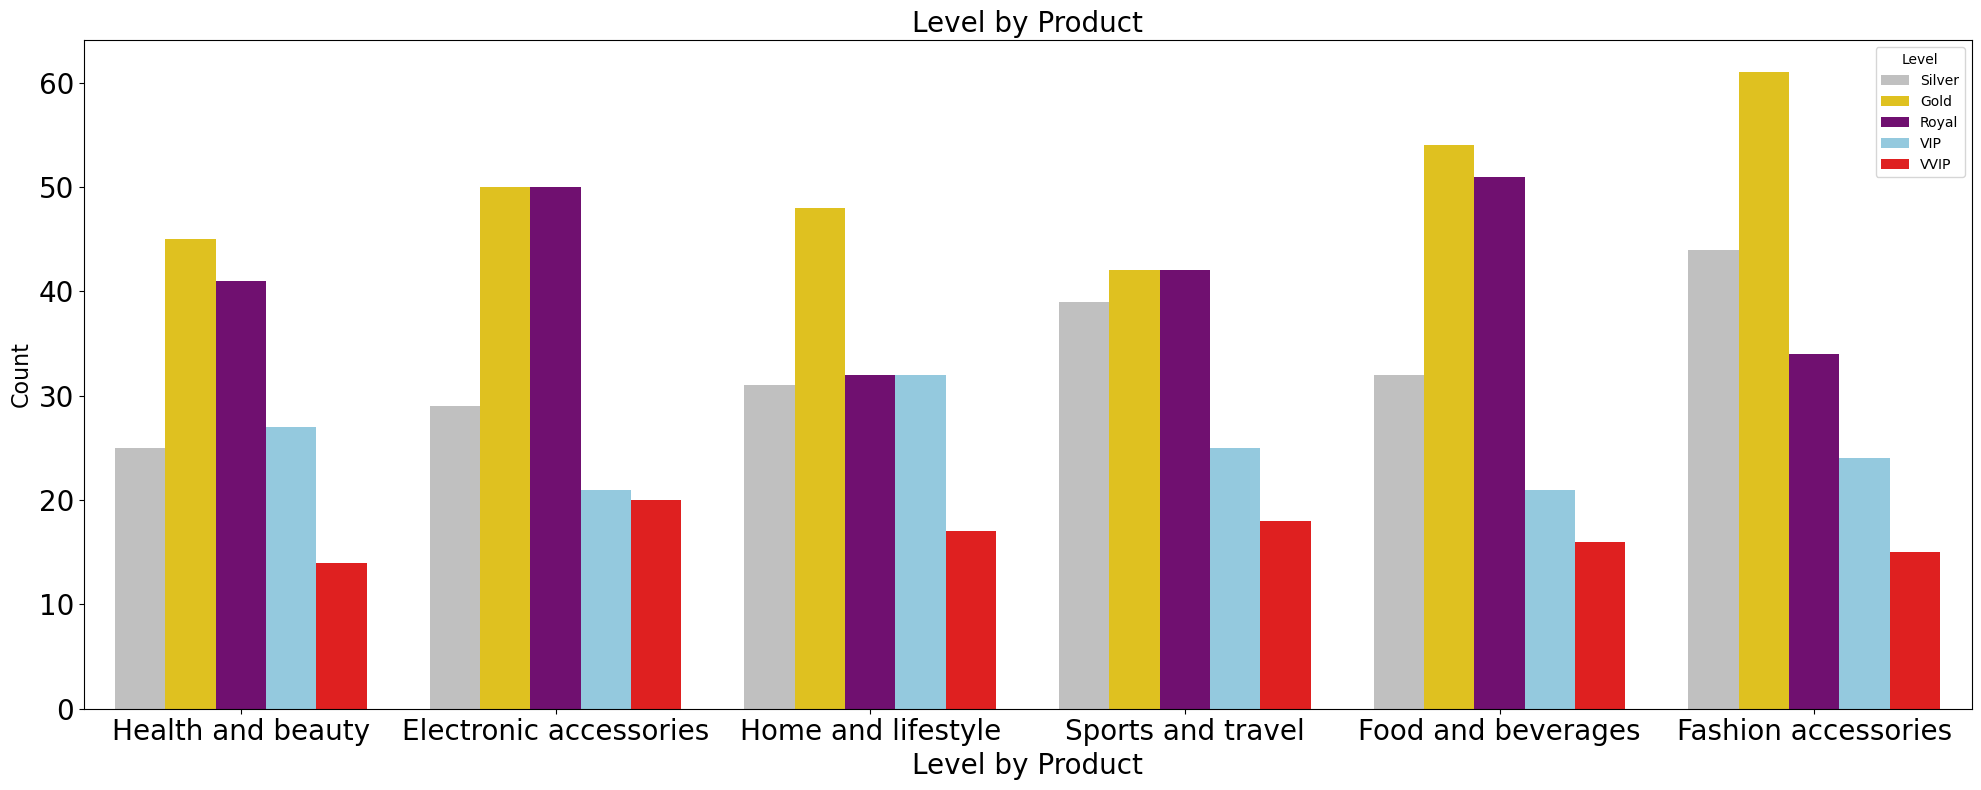

In [32]:
# 상품별 등급 분포 (Bar) , 상품별 총 이익률 (line) , 상품별 평점 분석 (line)

# 상품별 총 이익률 
income_df = merge_df.groupby('Product line')['Total'].sum().reset_index()
# 상품별 평균 가격 
unit_price_df = merge_df.groupby('Product line')['Unit price'].mean().reset_index()
# 월별 매출 
month_df = merge_df.groupby('Month')['Total'].sum().reset_index()

# 시간별 매출
time_df = merge_df.groupby('Time')['gross income'].sum().reset_index()

# 월별 매출 
month_df = merge_df[['Month', 'Total']].copy()
month_df = merge_df.groupby('Month')['Total'].sum().reset_index()

# month_df에서 'Month' 컬럼을 PeriodDtype에서 원하는 형식으로 변환
month_df['Month'] = month_df['Month'].dt.to_timestamp().dt.strftime('%Y-%m')


# 4 개의 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(30, 10))  # 전체 그래프의 크기 조정 가능

# 상품별 총 매출 이익 
sns.lineplot(x='Product line', y='Total', data=income_df, ax=axes[0])
axes[0].tick_params(labelsize=20) 
axes[0].set_title('Income by Product Line', fontsize=20)  # 첫 번째 차트의 타이틀 설정
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Product Line', fontsize=16)  
axes[0].set_ylabel('Income', fontsize=16)  

# 상품별 평균 가격 
sns.lineplot(x='Product line', y='Unit price', data=unit_price_df, ax=axes[1])
axes[1].set_title('Unit Price by Product Line', fontsize=20)  # 두 번째 차트의 타이틀 설정
axes[1].tick_params(labelsize=20) 
axes[1].tick_params(axis='x', rotation=90)  
axes[1].set_xlabel('Product Line', fontsize=16) 
axes[1].set_ylabel('Unit Price', fontsize=16)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(30, 10))  # 전체 그래프의 크기 조정 가능
# 시간별 매출 차트 
sns.lineplot(x='Time', y='gross income', data=time_df , ax=axes[0])
axes[0].set_title('Income by Time', fontsize=20)  # 두 번째 차트의 타이틀 설정
axes[0].tick_params(labelsize=20) 
axes[0].tick_params(axis='x', rotation=0)  # x축 레이블 회전
axes[0].set_xlabel('Time', fontsize=16)  # x축 레이블 설정
axes[0].set_ylabel('Income', fontsize=16)  # y축 레이블 설정

# 월별 매출 차트 
sns.lineplot(x='Month', y='Total', data=month_df, ax=axes[1])
axes[1].set_title('Income by Month', fontsize=20)  # 두 번째 차트의 타이틀 설정
axes[1].tick_params(labelsize=20) 
axes[1].tick_params(axis='x', rotation=90)  # x축 레이블 회전
axes[1].set_xlabel('Month', fontsize=16)  # x축 레이블 설정
axes[1].set_ylabel('Income', fontsize=16)  # y축 레이블 설정

plt.tight_layout()  # 서브플롯 간 간격 자동 조정
plt.show()

# 상품별 평점, RFM 점수를 분석 
rating_df = merge_df.groupby('Product line')['Rating'].mean().reset_index()
product_rfm_df = merge_df.groupby('Product line')['TotalScore'].sum().reset_index()

# 4 개의 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(30, 10))  # 전체 그래프의 크기 조정 가능

# 상품별 총 매출 이익 
sns.lineplot(x='Product line', y='Rating', data=rating_df, ax=axes[0])
axes[0].tick_params(labelsize=20) 
axes[0].set_title('Rating by Product Line', fontsize=20)  # 첫 번째 차트의 타이틀 설정
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Product Line', fontsize=16)  
axes[0].set_ylabel('Rating', fontsize=16)  

# 상품별 평균 가격 
sns.barplot(x='Product line', y='TotalScore', data=product_rfm_df, ax=axes[1])
axes[1].set_title('RFM by Product Line', fontsize=20)  # 두 번째 차트의 타이틀 설정
axes[1].tick_params(labelsize=20) 
axes[1].tick_params(axis='x', rotation=90)  
axes[1].set_xlabel('Product Line', fontsize=16) 
axes[1].set_ylabel('RFM', fontsize=16)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(20, 8))
level_colors = {'Silver': 'silver', 'Gold': 'gold', 'Royal': 'purple', 'VIP': 'skyblue', 'VVIP': 'red'}

sns.countplot(x='Product line', hue='Level', data=merge_df, palette=level_colors, hue_order=order_columns)
ax.tick_params(labelsize=20) 
ax.set_title('Level by Product', fontsize=20)
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Level by Product', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()



### 📌 상품별 카테고리 분석
#### 상품 카테고리 별 총 이익률
- 식품 & 음료 부문에서 매출 총 이익률이 가장 높았으며, 건강 & 화장품 품목의 매출 총 이익률이 가장 낮은 것을 알 수 있다.
#### 상품 카테고리 별 가격
- 패션 악세사리 카테고리와 운동 & 여행 카테고리의 평균 가격이 가장 높은 것을 알 수 있다. 반면 전자 악세사리 품목의 가격이 가장 낮았다.
#### 시간별 총 이익률 
- 18-20시 사이에 매출 총 이익률이 가장 높은 것을 알 수 있다.
#### 월별 총 이익률 
- 2019-01월에 가장 매출 총 이익률이 높았고, 2019-02월에 가장 낮음을 알 수 있다.
#### 상품 카테고리 별 평점 
- 상품별 평균 평점 같은 경우 식품 & 음료 부문에서 가장 높은 평점을 받았으며, 가정 및 생활 품목에서 가장 낮은 평점을 받았다.
#### 상품 카테고리 별 RFM 점수 
- 전자 악세사리 에서 가장 높은 RFM 점수를 받았으며, 건강 & 화장품 품목의 RFM 점수가 가장 낮았다.
### 📌 결론
- 가장 인기 있는 상품은 식음료 품목과 패션 악세사리 품목 이므로, 위 두 상품에 대한 집중적인 마케팅이 필요할 것으로 보입니다.
- 이 두 인기상품의 마케팅을 가장 활동량이 많은 시간대인 19시에 저녁 할인 이벤트 등을 런칭해서 더 높은 구매력을 이끌 수 있겠습니다.

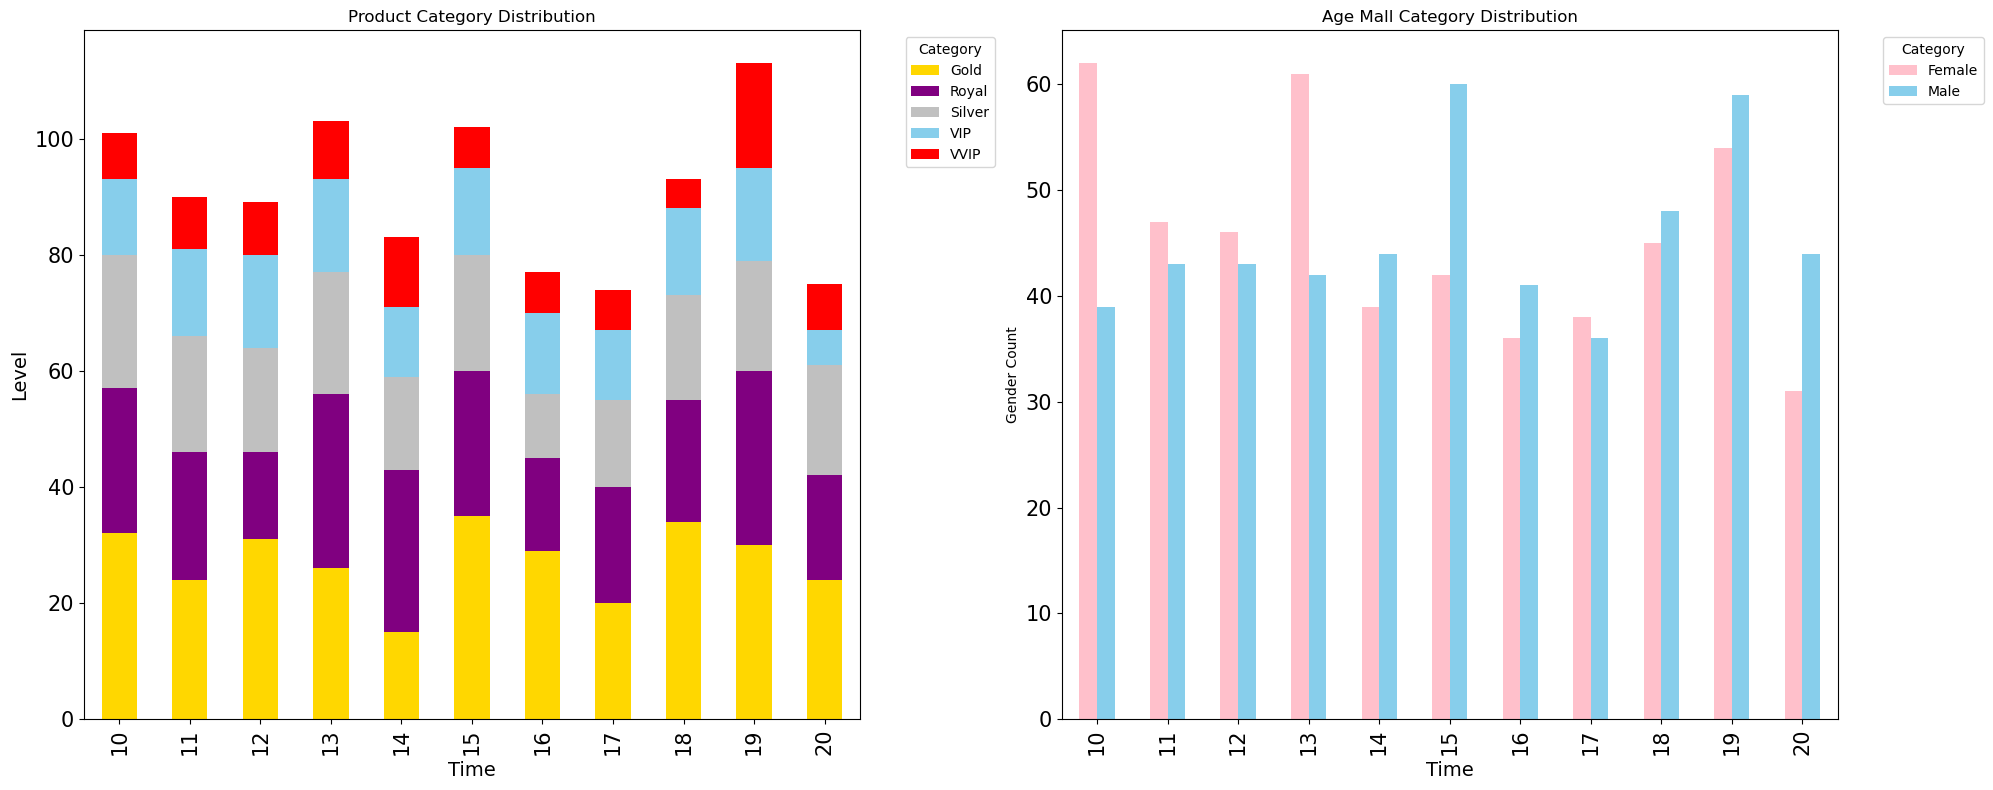

In [33]:
#### 성별에 따른 선호하는 상품 카테고리 & 상품 카테고리 회원 등급 분포 

# 그래프 크기 설정
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

grouped_time_level = merge_df.groupby(['Time', 'Level']).size().unstack(fill_value=0)
grouped_gender_category = merge_df.groupby(['Time', 'Gender']).size().unstack(fill_value=0)
grouped_gender_total = merge_df.groupby('Gender')['Total'].sum().reset_index()

colors = {'Silver': 'silver', 'Gold': 'gold', 'Royal': 'purple', 'VIP': 'skyblue', 'VVIP': 'red'}

# 쇼핑몰별 카테고리 분석 차트
grouped_time_level.plot(kind='bar', stacked=True,color=colors, ax=axes[0])
axes[0].tick_params(labelsize=15) 
axes[0].set_title('Product Category Distribution')
axes[0].set_xlabel('Time', fontsize=14)
axes[0].set_ylabel('Level', fontsize=14)
axes[0].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# 성별에 따른 쇼핑활동 시간 차트
grouped_gender_category.plot(kind='bar', ax=axes[1], color=['pink', 'skyblue'])
axes[1].tick_params(labelsize=15) 
axes[1].set_title('Age Mall Category Distribution')
axes[1].set_xlabel('Time', fontsize=14)
axes[1].set_ylabel('Gender Count')
axes[1].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()

#### 시간별 멤버 등급 & 성별 분포도
- 18-20시 사이에 매출 총 이익률이 가장 높았던 것을 보았고, 위 시각화 그래프에서는 19시에 VVIP 회원의 분포수가 다른 시간대에 비해 높은 것을 볼 수 있습니다. 이 점을 고려하여 VVIP 회원의 영향력이 매장 매출에 큰 영향력을 끼치는 것을 확인 할 수 있습니다.
- 성별 분포에서도 마찬가지로 19시 경에 남자회원들이 여자회원들보다 근소하게 비중이 높지만 남녀 모두 높은 수치를 보이는 것을 알 수 있습니다.
- 남자회원의 활동이 가장 많았던 시기는 15시와 19시 였으며, 여자 회원의 활동이 가장 많았던 시기는 10시, 13시 경인 것을 알 수 있습니다. 

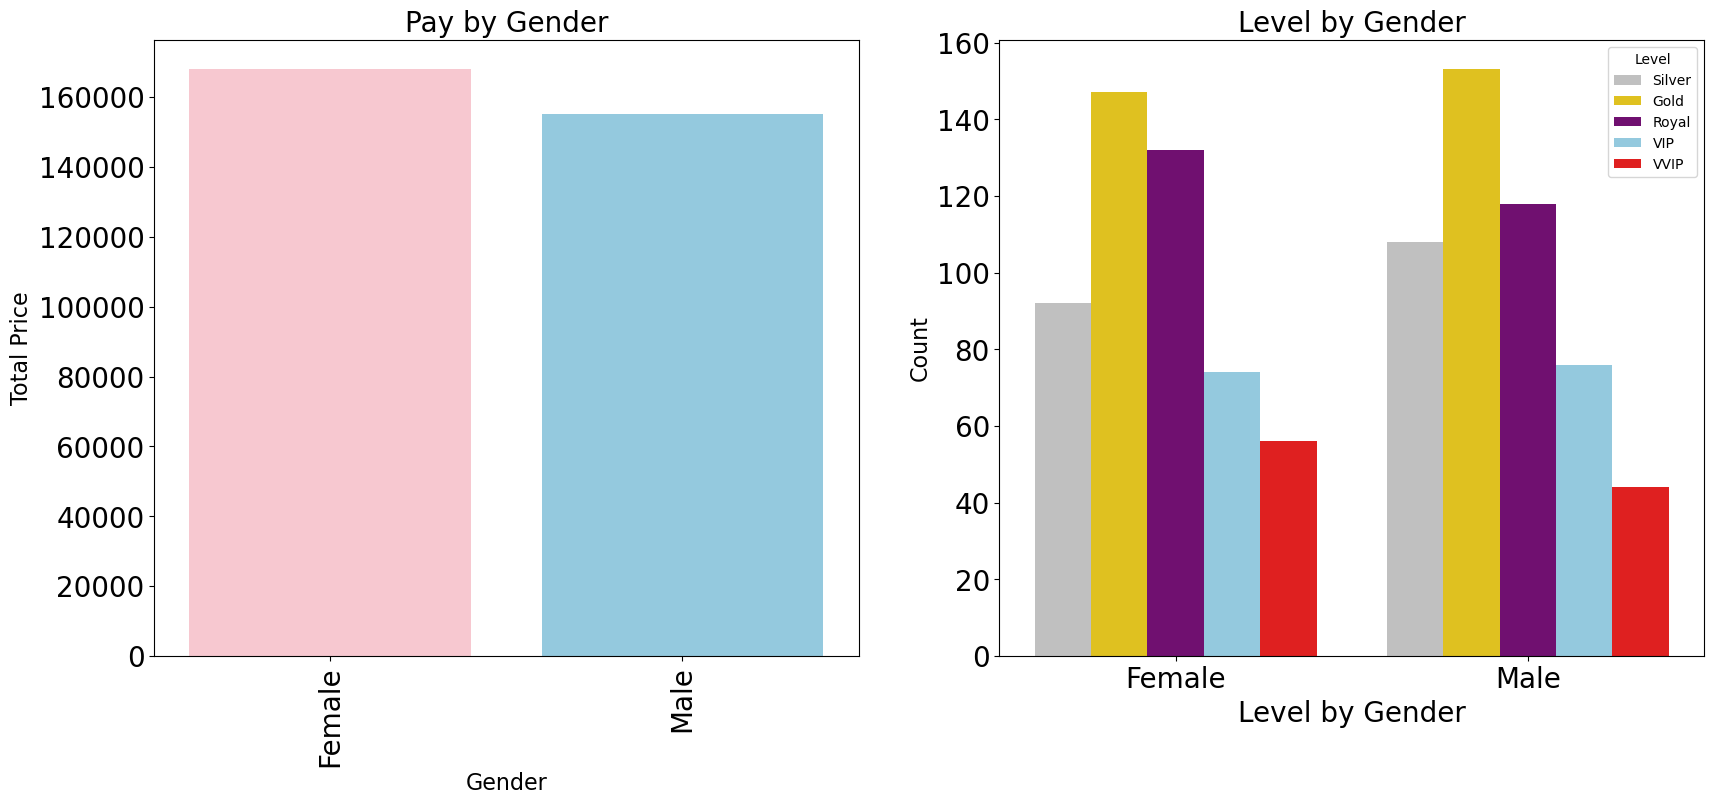

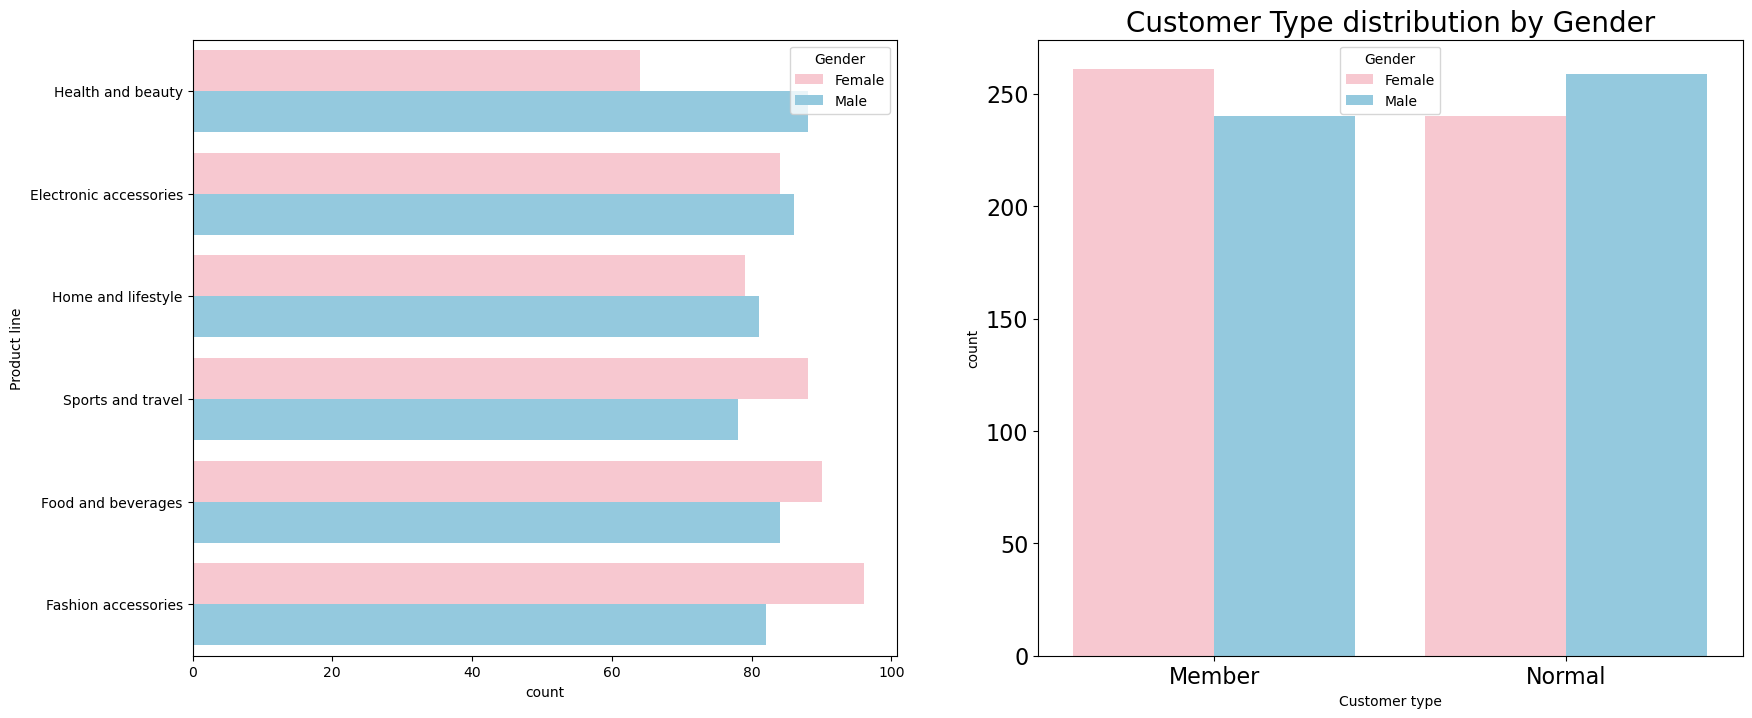

In [34]:
# 성별에 따른 멤버 등급 분포도 & 구매율 , 상품별 성별 선호도, 회원 유형 별 성별 분포도 
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 바 차트 생성 및 색상 지정
sns.barplot(x='Gender', y='Total', data=grouped_gender_total, ax=axes[0], palette={'Female': 'pink', 'Male': 'skyblue'})
product_colors = ['pink', 'skyblue', 'khaki', 'lightgreen', 'tomato', 'orange']
grouped_gender_type = merge_df.groupby(['Gender', 'Customer type']).size().unstack(fill_value=0)
type_order = ['A', 'B', 'C']

# 축과 타이틀 설정 (남녀 별 총 구매량)
axes[0].tick_params(labelsize=20) 
axes[0].set_title('Pay by Gender', fontsize=20)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Gender', fontsize=16)  
axes[0].set_ylabel('Total Price', fontsize=16)

sns.countplot(ax=axes[1], x='Gender', hue='Level', data=merge_df, palette=colors, hue_order=order_columns)
axes[1].tick_params(labelsize=20) 
axes[1].set_title('Level by Gender', fontsize=20)
axes[1].set_ylabel('Count', fontsize=16)
axes[1].set_xlabel('Level by Gender', fontsize=20)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 세로로 바꾼 countplot 생성
sns.countplot(ax=axes[0], y='Product line', hue='Gender', data=merge_df, palette=product_colors)

sns.countplot(ax=axes[1], x='Customer type', hue='Gender' ,data=merge_df, palette={'Female': 'pink', 'Male': 'skyblue'})
axes[1].tick_params(labelsize=16) 
axes[1].set_title('Customer Type distribution by Gender', fontsize=20)

plt.show()

In [35]:
# merge_df.groupby('Gender')['Total'].sum()

#### 성별에 따른 총 구매량 & 회원 등급 분포 & 상품별 성별 분포 & 회원 유형별 성별 분포 분석 
- 성별에 따른 총 구매량 분석결과 여성이 대략 16만7천, 남성이 15만5천으로 여성이 남성보다 총 구매량과 쇼핑 이용 횟수가 더 높은 것으로 나타났다.
- 성별 별 회원 등급 분포의 경우 여성 회원의 경우 Royal, VVIP 등급의 회원 분포가 남성 회원 보다 높았고, 남성 회원의 경우 실버 등급과 골드 등급의 분포가 여성보다 높은 것을 볼 수 있다.
- 높은 등급에 해당하는 Royal 등급과 VVIP 등급 분포가 여성 회원에서 더 많은 것으로 볼때, 여성들이 구매력과, 충성도가 더 높다.
- 상품 카테고리 별 성별 분포도의 경우 여성이 가장 높은 비중을 차지하는 것은 패션 악세사리이며 그 다음으로는 식음료, 가장 낮은 비중을 차지 한 카테고리는 건강&화장품 카테고리이다. 남성의 경우 가장 높은 비중을 차지한 것은 건강&화장품 카테고리였으며, 그 다음으로 전자 악세사리과 건강&식품 카테고리였으며, 가장 낮은 비중을 차지 한 것은 운동 & 여행 카테고리였다.
- 고객 유형 별로 성별 분포를 분석한 결과 매장 회원으로 등록된 고객들은 여성들이 많았고, 일반회원들은 남성에게 많았다.
#### 📌 결론
- 분석 결과, 여성들은 남성들보다 더 높은 구매력을 보여주며, 특히 식음료 및 패션 악세사리 카테고리에서 더 많은 구매를 하는 경향이 있음이 확인되었습니다. 이러한 트렌드를 바탕으로 여성 대상의 패션 관련 마케팅 전략을 강화하는 것이 유익할 것으로 보입니다.
- 반면 평점과 판매율에서 매우 저조했던 건강&화장품목 에서는 여성의 비율이 현저히 낮은 것을 볼 수 있는데, 여성들을 대상으로한 건강&화장품 할인 이벤트를 진행하며, 남성들이 가장 많이 구매한 품목은 반대로 건강&화장 품목이므로 질 높은 상품들을 판매하여 평점 상승을 유도하며 매출을 높이는것 이 좋을것으로 예상된다.

In [36]:
unit_price_df

,Product line,Unit price
0,Electronic accessories,53.551588
1,Fashion accessories,57.153652
2,Food and beverages,56.008851
3,Health and beauty,54.854474
4,Home and lifestyle,55.316937
5,Sports and travel,56.993253


#### 지역별 등급 분포, 구매력 분석 

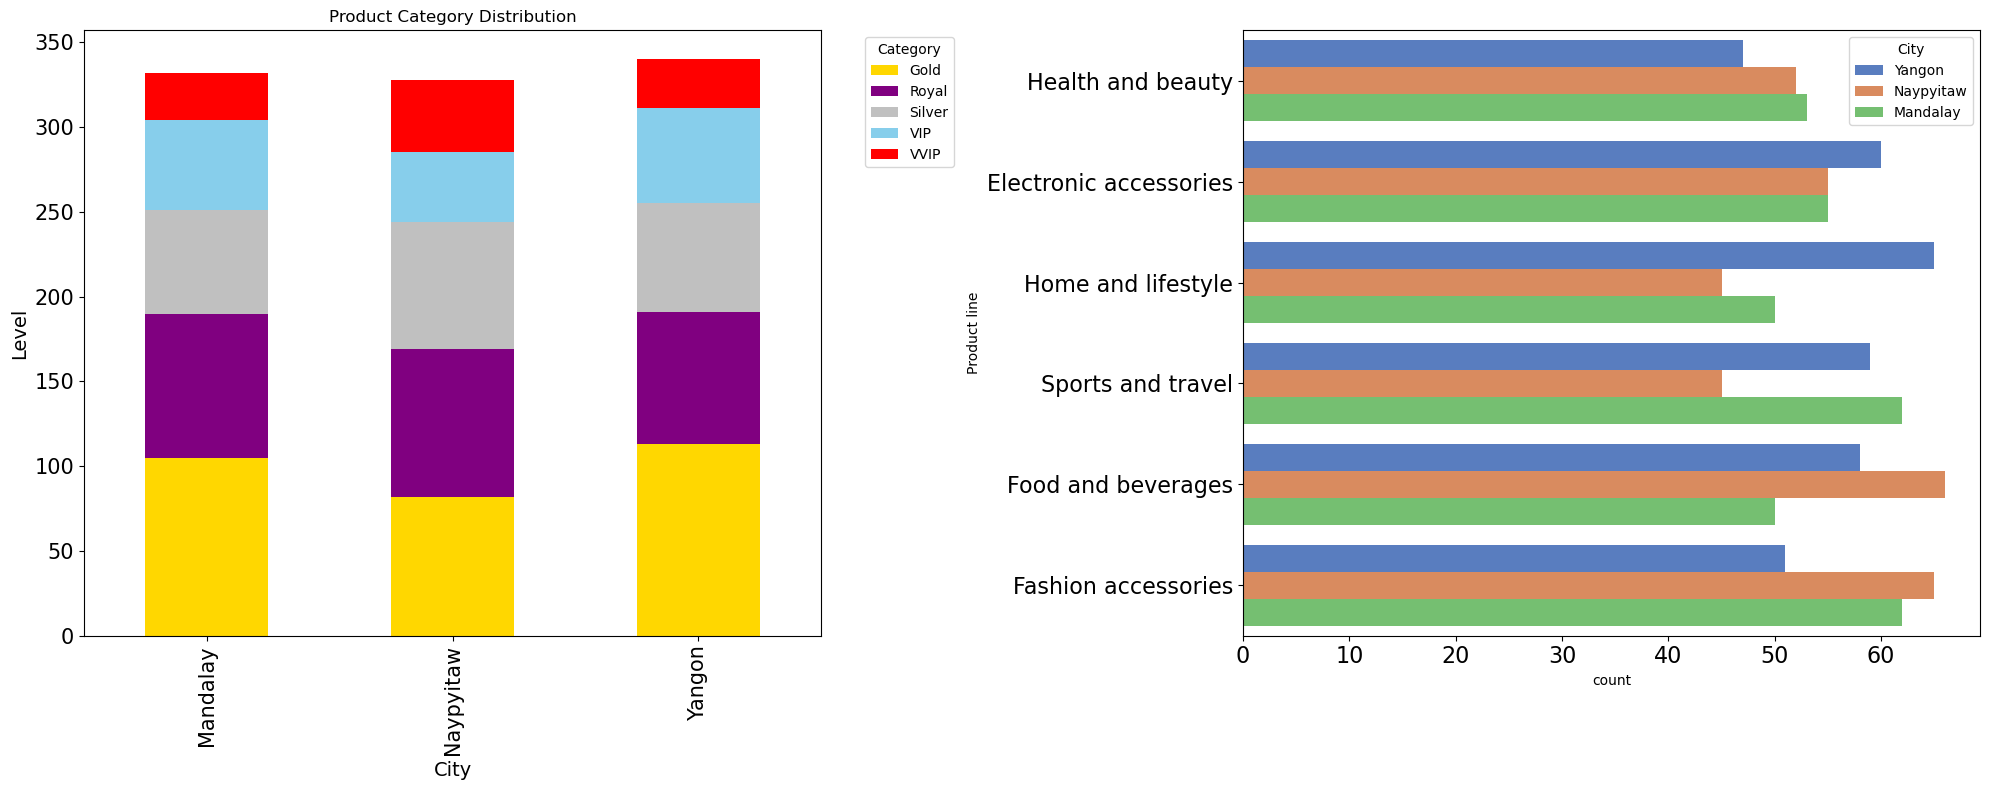

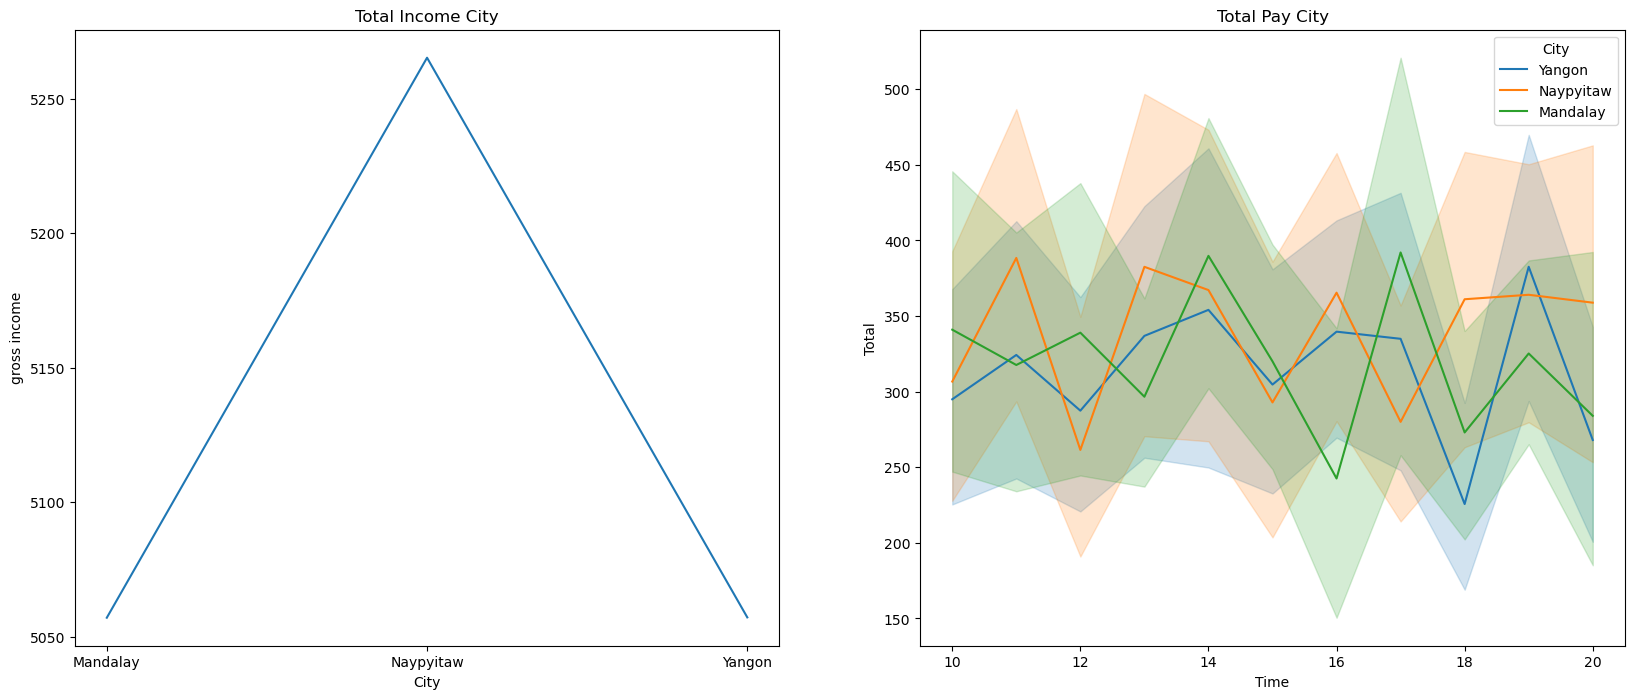

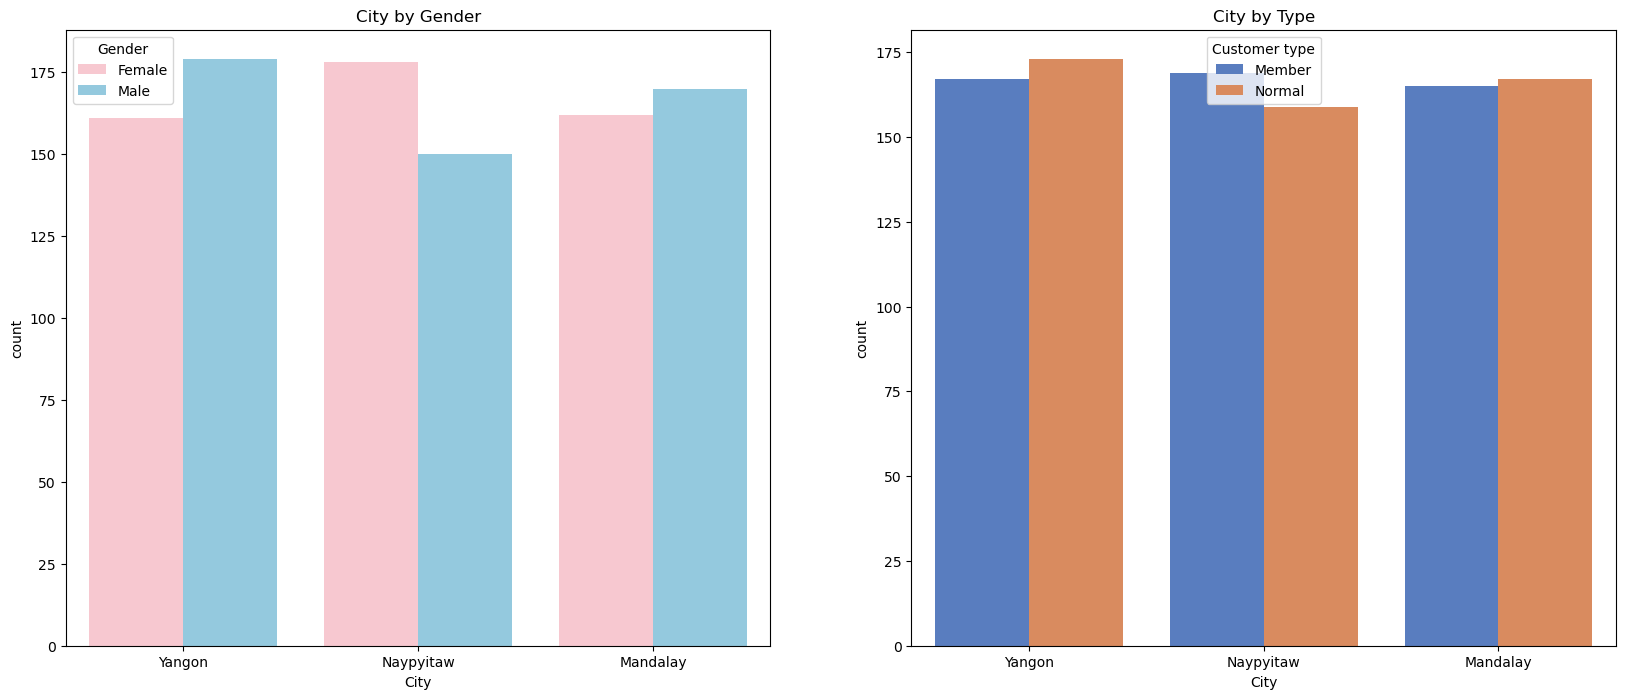

In [37]:
#### 지역에 따른 선호하는 상품 카테고리 & 총 이익률 분포 

# 그래프 크기 설정
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

grouped_city_level = merge_df.groupby(['City', 'Level']).size().unstack(fill_value=0)
grouped_city_category = merge_df.groupby(['City', 'Product line']).size().unstack(fill_value=0)
grouped_city_total = merge_df.groupby('City')['Total'].sum().reset_index()
grouped_city_income = merge_df.groupby('City')[['gross income','Total']].sum().reset_index()

colors = {'Silver': 'silver', 'Gold': 'gold', 'Royal': 'purple', 'VIP': 'skyblue', 'VVIP': 'red'}
product_c = {'#F7819F','#FF00BF','#AC58FA', '#819FF7','#A9F5E1', '#FFBF00'}
city_colors = {'lightgreen','lightskyblue','pink'}

# 쇼핑몰별 카테고리 분석 차트
grouped_city_level.plot(kind='bar', stacked=True,color=colors, ax=axes[0])
axes[0].tick_params(labelsize=15) 
axes[0].set_title('Product Category Distribution')
axes[0].set_xlabel('City', fontsize=14)
axes[0].set_ylabel('Level', fontsize=14)
axes[0].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


# 세로로 바꾼 countplot 생성
sns.countplot(ax=axes[1], y='Product line', hue='City', data=merge_df, palette='muted')
axes[1].tick_params(labelsize=16) 

# 그래프 표시
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# merge_df['Month'] = merge_df['Month'].dt.to_timestamp().dt.strftime('%Y-%m')


# 지역별 총 이익률 
sns.lineplot(ax=axes[0],x='City', y='gross income', data=grouped_city_income)
axes[0].set_title('Total Income City')
sns.lineplot(ax=axes[1], x='Time', y='Total', hue='City', data=merge_df)
axes[1].set_title('Total Pay City')
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(ax=axes[0],x='City', hue='Gender', data=merge_df, palette=product_colors)
axes[0].set_title('City by Gender') 

sns.countplot(ax=axes[1],x='City', hue='Customer type', data=merge_df, palette='muted')
axes[1].set_title('City by Type')
plt.show()


### 도시별 회원 등급 분포 & 상품 카테고리 선호도 분석 
- #### 💡 가설 
  > 여성이 남성보다 구매력이 더 좋은 것을 확인 했으니, 세 개의 도시에서 모두 여성 고객이 많을것이다.
  > 
  > 세개의 도시에서 모두 식음료, 패션 카테고리가 인기가 제일 많을 것이다.
- 위 세개의 도시들은 모두 미얀마 국가의 도시들이다.

- #### 도시별 분석  
- 📌 Mandalay : 골드 등급과 로얄 등급의 회원분포가 거의 동일하며 VVIP 회원들의 분포수가 가장 적다.
- 가장 인기 있는 있는 상품은 패션 악세사리와 운동 및 여행 품목이다.
- 14시, 17시경에 쇼핑 활동이 많고, 16시경에 가장 이용 활동이 적은 것을 볼 수 있다.
- 남성 고객이 여성 고객보다 더 많다.
  <div>
      <img src='./images/city1.jpg' width='700' style="margin-left:20">
  </div>
 
- 📌 Naypyidaw : 미얀마의 수도인 네피도우의 경우 로얄 등급의 회원 분포가 가장 많으며, 그 다음으로 실버등급과 골드등급의 회원 분포수가 동일하고 VVIP 회원들의 분포수가 VIP 등급회원 들보다 많다.
- 가장 인기 있는 상품은 패션 악세사리와 식품,음료 품목이다.
- 가장 총 이익률과 판매량이 높은 도시이며, 판매량이 가장 높았던 시간대인 18 ~ 20시 사이에 네피도우 지점 역시 판매량이 높다.
- 여성 고객이 남성 고객보다 더 많다.
  <div>
      <img src='./images/city2.jpg' width='700' style="margin-left:20">
  </div>
- 📌 Yangon : 미얀마에서 가장 큰 도시인 양곤의 경우 골드등급의 회원수가 가장 많으며, VVIP 회원들의 분포수가 가장 적다.
- 가정,생활 용품 품목이 가장 인기가 많으며, 건강&화장품의 인기가 적다.
- 18시경에 가장 낮은 판매율을 보이며, 19시에 가장 높은 판매율을 보인다.
- 남성 고객이 여성 고객보다 더 많다.
  <div>
      <img src='./images/city3.jpg' width='700' style="margin-left:20">
  </div>

### RFM 최종 분석 보고서  
- 가장 구매력이 높았던 도시는 미얀마의 현 수도인 naypyidaw 였으며, 이 도시에서는 여성 고객의 비율이 남성 고객 보다 높은 것을 알 수 있었습니다. VVIP 등급의 분포 와 매장의 회원으로 등록된 고객들이 아닌 고객들보다 더 많았습니다.
- 이러한 고객들의 비율이 높다는 것은 고소득 고객층의 충성도가 높다는 신호입니다. 이러한 고객층을 위한 특별한 혜택이나 서비스를 제공하여 매출 이익을 높일 수 있습니다.
- naypidaw 지점에 구매력과 매출이 높은 이유는 아무래도 수도 이기도 하고 미얀마의 중부에 위치하여 있어, 현지인 외에도 관광객, 또는 다른 지역에서 놀러오는 사람들의 수요가 큰 부분도 한 몫을 한 것 같습니다.
- 가장 인기 있는 제품 또한 식음료 품목과 패션 악세사리 였으므로, 식음료 품목과 패션 악세사리 제품의 재고를 적절히 관리하여, 고객의 수요를 만족시킬 수 있어야 합니다.

 <div>
      <img src='./images/city2.jpg' width='500' style="margin-left:20">
     <img src='./images/rfm.png' width='500' style="margin-left:20">
  </div>

 <div>
      
  </div>

- 나머지 양곤이나, 만달레이 와 같은 도시의 경우 남성 고객이 여성 고객보다 더 많은 비율을 보이며, 매장 회원이 아닌 일반 회원으로 되어있는 고객들이 많은 것을 알 수 있었습니다.

- 그러나 매출 수익에서 naypyidaw 지역에 비해 적은 매출 수익을 보인 것을 알 수 있는데, 양곤 지역 같은 경우에는 남성 고객의 비율이 여성 고객보다 많고, 가정,생활 용품 품목 또한 인기가 많았으므로, 양곤 지점에서는 남성 고객을 주 타겟팅으로한 마케팅 전략과 가정&생활 용품에 관련된 마케팅 전략을 펼쳐야 합니다. 또한 양곤이라는 도시는 미얀마 최대 도시이며 인구도 가장 많기 때문에, 높은 잠재력을 가진 도시라고 볼 수 있습니다. 이 점을 참고해서 가장 쇼핑 활동이 많은 시간대인 저녁 시간대를 기준으로 매장 내 음식점 등 다양한 즐길거리를 배치해서 신규 고객들을 유입 시킬 수 있습니다.
- 만달레이 지점의 경우에도 위 두 도시들의 마케팅 전략을 참고하여 신규 고객들을 유입 하여 이전보다 높은 매출 수익을 기대 할수 있습니다.

    <div>
      <img src='./images/city3.jpg' width='500' style="margin-left:20">
         <img src='./images/city1.jpg' width='500' style="margin-left:20">
  </div>
  <!-- <div>
      <img src='./images/city2.jpg' width='500' style="margin-left:20">
  </div> -->

In [38]:
merge_df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [39]:
grouped_city_income

,City,gross income,Total
0,Mandalay,5057.0320,106197.6720
1,Naypyitaw,5265.1765,110568.7065
2,Yangon,5057.1605,106200.3705


<!-- ### RFM 분석 보고서
- #### 📌 회원 등급과 상품 품목 분포도 분석

<img src='./images/level.png'>

- 💡 우선 골드 등급이 가장 높았고, 로얄등급이 그 다음으로 높은 등급인 것을 보아, 이 매장의 사업 현황으로는 정상적인 수치를 보인다고 할 수 있습니다.
- 오른쪽 그래프는 상품 품목별 판매 분포수인데, 모든 품목들이 골고루 분포되어 있지만 그중에 가장 높은 수치를 기록한 품목은 식품&음료 품목으로 17.8% 의 수치이며, 가장 적은 수치의 품목은 건강&화장 품목입니다.
  
- 이 결과를 보았을 때 해당 매장에서 가장 인기 있는 품목은 식품&음료 품목인 것을 판단할 수 있었습니다.
- 그 다음으로 상품별 총 판매가격 및 총 매출 이익에 대해서 말씀드리겠습니다.
  
   
<img src='./images/price.png' style="margin-top:50px; margin-bottom:50px">

- 왼쪽 시각화그래프는 상품별 매출 총 판매량에 대한 그래프이고 오른쪽 그래프는 상품별 평균 가격입니다.
  
- 가장 높은 판매량을 기록한 상품 품목은 식품&음료 품목이였으며, 반대로 가장 적은 매출 이익을 기록한 품목은 건강&화장 품목으로 위의 파이차트와 비슷한 결과가 나온 것을 알 수 있습니다.
  
- 오른쪽 상품별 평균 가격을 보면, 패션 악세사리가 가장 높은 가격인 것을 알 수 있으며, 왼쪽 매출 이익 차트에서 봤을 때 패션 악세사리 품목은 꽤 높은 매출 이익인 것을 볼 수 있습니다.
  
- 가장 평균 가격이 낮은 품목은 전자 악세사리이며, 매출 이익 부문에서 패션 악세사리와 동일한 수치를 기록하였습니다.

- 이를 미루어보았을 때 전자 악세사리 같은 경우 대중적인 상품 인 것으로 판단할 수 있고, 패션 악세사리는 높은 가격이지만 그만큼 구매력이 높은 고객들에게 판매가 되서 꽤 높은 매출이익을 낼수 있었던 것으로 판단되었습니다.

<img src='./images/product_level.png' style="margin-top:50px; margin-bottom:50px">

 -->

In [40]:
merge_df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64